<a href="https://colab.research.google.com/github/luisbisaro/pandas.datasets/blob/main/C3_Regresion_univariada_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión Univariada con Python**

La idea es tomar un conjunto de datos en un dataframe y realizar una regresion lineal, aprovechando para demostrar algunas caracteristicas de Python y bibliotecas comunes.

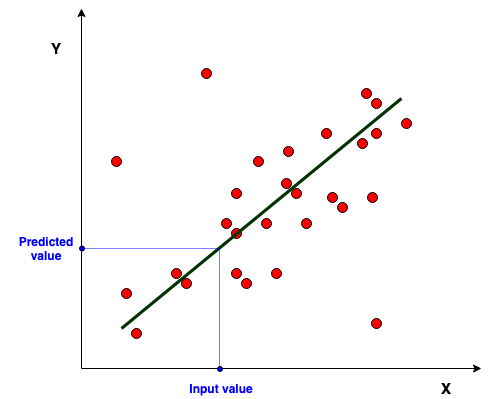

In [ ]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

---
## **Acceso al dataset y visualizacion**

El dataset contiene información de años de experiencia (X) versus salario (Y), y se hipotetiza que X puede servir para predecir Y.[dataset de transporte](https://datos.transporte.gob.ar/dataset/58873535-ff10-42bd-8db8-72f8ae15960f/archivo/32bef76d-3b46-41d4-9a99-a9ad47955ffa)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UPATECO/DATA SCIENCIE/ML tramo2/dat-ab-usos-2023.csv')
print('size:', data.shape)
data.head(100)

size: (360321, 10)


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO
...,...,...,...,...,...,...,...,...,...,...
95,2023-01-01,EMPRESA TANDILENSE S.A.C.I.F.I.Y DE S.,BSAS_LINEA_152,SI,COLECTIVO,NACIONAL,JN,SD,14533,NO
96,2023-01-01,MICROOMNIBUS SAAVEDRA S.A.T.A.C.I.,BSAS_LINEA_153,SI,COLECTIVO,NACIONAL,JN,SD,1535,NO
97,2023-01-01,MICROOMNIBUS CUARENTA Y CINCO S.A.C.I.F.,BSAS_LINEA_154,SI,COLECTIVO,NACIONAL,JN,SD,468,NO
98,2023-01-01,EL PUENTE S.A.T.,BSAS_LINEA_158,SI,COLECTIVO,NACIONAL,JN,SD,2226,NO


In [ ]:
data.describe()

,CANTIDAD
count,360321.000000
mean,9212.805085
std,20225.871211
min,-25.000000
25%,686.000000
50%,2605.000000
75%,8968.000000
max,510015.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360321 entries, 0 to 360320
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   360321 non-null  object
 1   NOMBRE_EMPRESA   360321 non-null  object
 2   LINEA            360321 non-null  object
 3   AMBA             360321 non-null  object
 4   TIPO_TRANSPORTE  360321 non-null  object
 5   JURISDICCION     358351 non-null  object
 6   PROVINCIA        358351 non-null  object
 7   MUNICIPIO        358351 non-null  object
 8   CANTIDAD         360321 non-null  int64 
 9   DATO_PRELIMINAR  360321 non-null  object
dtypes: int64(1), object(9)
memory usage: 27.5+ MB


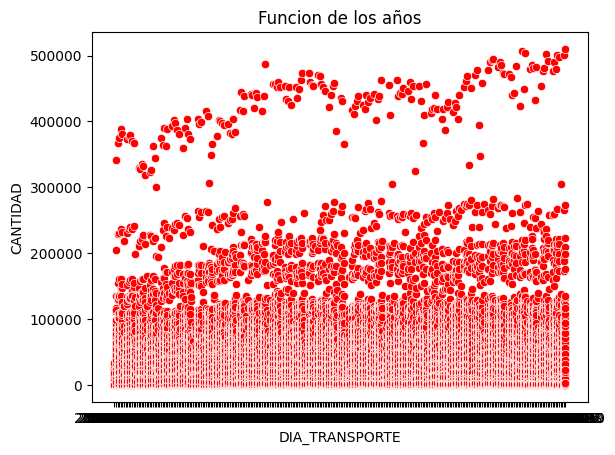

In [ ]:
# Un primer grafico de puntos (usando seaborn)
sns.scatterplot(x=data['DIA_TRANSPORTE'], y=data['CANTIDAD'], color='red')
#plt.plot(data['YearsExperience'], data['Salary'])
plt.title("Funcion de los años")
plt.show()

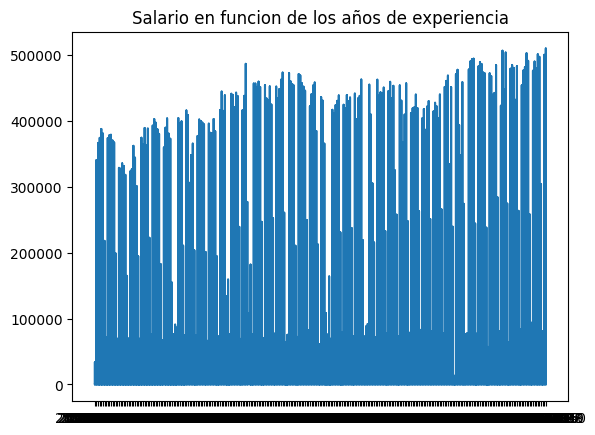

In [ ]:
# Grafico de lineas (usando mathplotlib)
plt.plot(data['DIA_TRANSPORTE'], data['CANTIDAD'])
plt.title("Salario en funcion de los años de experiencia")
plt.show()

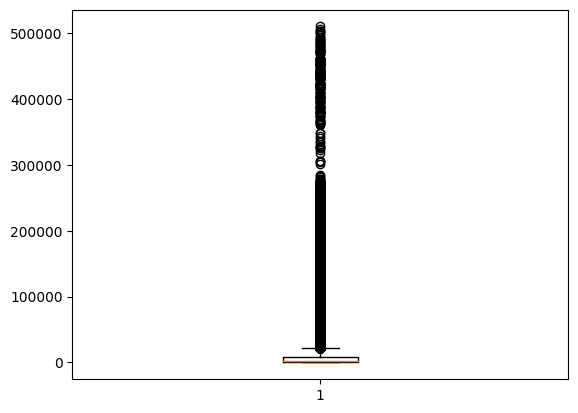

In [ ]:
# Como boxplot
plt.boxplot(data['CANTIDAD'])
plt.show()

<Axes: >

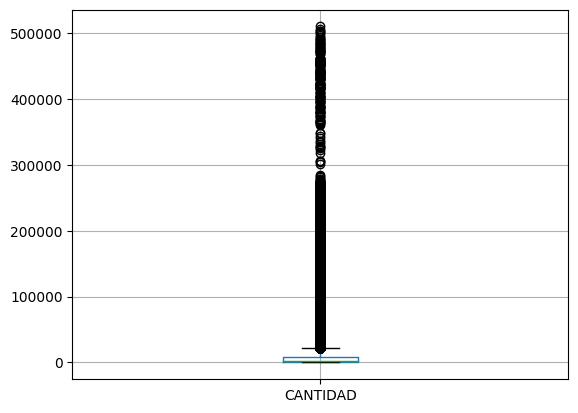

In [ ]:
data.boxplot()

In [ ]:
df=data[data['LINEA']=='FFCC ROCA']
print(df)

       DIA_TRANSPORTE NOMBRE_EMPRESA      LINEA AMBA TIPO_TRANSPORTE  \
350        2023-01-01   SOFSE - Roca  FFCC ROCA   SI            TREN   
1287       2023-01-02   SOFSE - Roca  FFCC ROCA   SI            TREN   
2484       2023-01-03   SOFSE - Roca  FFCC ROCA   SI            TREN   
3683       2023-01-04   SOFSE - Roca  FFCC ROCA   SI            TREN   
4885       2023-01-05   SOFSE - Roca  FFCC ROCA   SI            TREN   
...               ...            ...        ...  ...             ...   
354214     2023-10-06   SOFSE - Roca  FFCC ROCA   SI            TREN   
355592     2023-10-07   SOFSE - Roca  FFCC ROCA   SI            TREN   
356776     2023-10-08   SOFSE - Roca  FFCC ROCA   SI            TREN   
357900     2023-10-09   SOFSE - Roca  FFCC ROCA   SI            TREN   
359288     2023-10-10   SOFSE - Roca  FFCC ROCA   SI            TREN   

       JURISDICCION PROVINCIA MUNICIPIO  CANTIDAD DATO_PRELIMINAR  
350        NACIONAL        JN        SD     33798              NO  

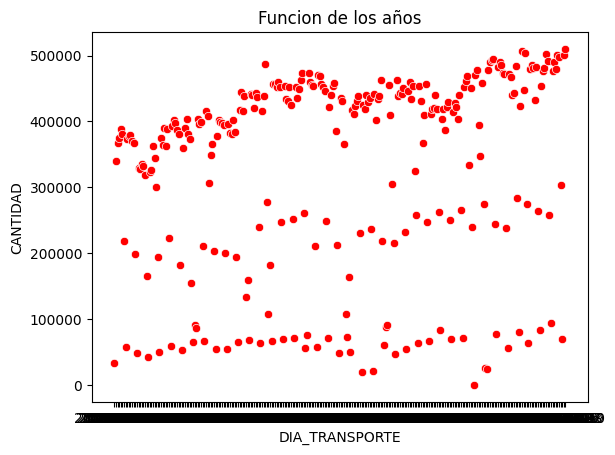

In [ ]:
# Un primer grafico de puntos (usando seaborn)
sns.scatterplot(x=df['DIA_TRANSPORTE'], y=df['CANTIDAD'], color='red')
#plt.plot(data['YearsExperience'], data['Salary'])
plt.title("Funcion de los años")
plt.show()

<Axes: >

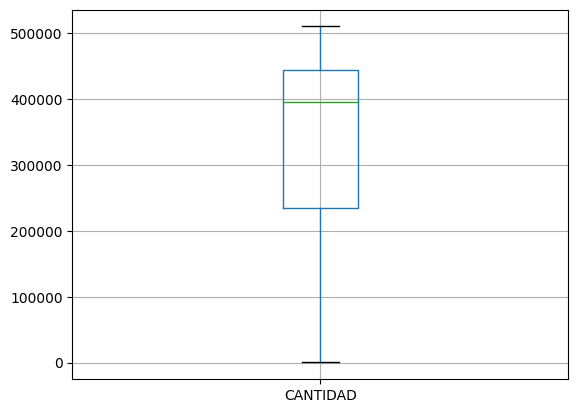

In [ ]:
df.boxplot()


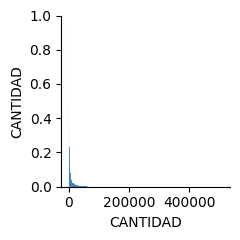

In [ ]:
columnas = [	'DIA_TRANSPORTE', 'NOMBRE_EMPRESA',	'LINEA',	'AMBA',	'TIPO_TRANSPORTE',	'JURISDICCION',	'PROVINCIA',	'MUNICIPIO',	'CANTIDAD',	'DATO_PRELIMINAR']
#columnas = [1,2]
sns.pairplot(data[columnas], height=2.5)
plt.tight_layout()
plt.show()

In [ ]:
# Calculamos la correlacion entre ambas variables. Si es buena, entonces podriamos construir un modelo
correlation = df.corr() #if we got good correlation between x and y then we can go for model building
correlation

<ipython-input-75-c8f3e8aa3eb4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr() #if we got good correlation between x and y then we can go for model building


,CANTIDAD
CANTIDAD,1.0


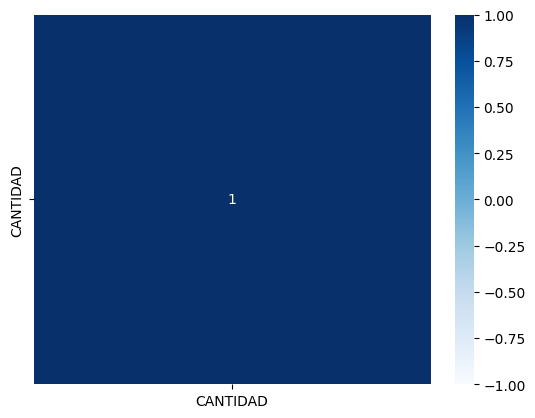

In [ ]:
# Visualizacion alternativa de la correlacion como heatmap
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, cmap="Blues")
plt.show()

## **Modelo de Regresion (*statsmodel*)**

In [ ]:
import statsmodels.formula.api as sms

# Salary (y) es una funcion lineal de YearsExperience (x)
model = sms.ols("CANTIDAD~DIA_TRANSPORTE", data=data).fit()
print(model.summary())

# we get a good value for R-squared
# null hypothesis: beta_1 (coeff. of YearsExperience) = 0
# alternative hypothesis: beta_1 != 0
# p-low  null-go, hence null hypothesis rejected and alternative hypothesis accepted
# This means that here is a relation between x and y

                            OLS Regression Results                            
Dep. Variable:               CANTIDAD   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     21.72
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:08:49   Log-Likelihood:            -4.0807e+06
No. Observations:              360321   AIC:                         8.162e+06
Df Residuals:                  360039   BIC:                         8.165e+06
Df Model:                         281                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
y_pred = model.predict(data["DIA_TRANSPORTE"])
#predicted_salary = pd.Series(data = y_pred, name='PredictedSalary')

data['PredictedCANTIDAD'] = y_pred
data.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,PredictedCANTIDAD
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,1907.833693
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,1907.833693
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,1907.833693
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,1907.833693
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,1907.833693


In [ ]:
# Grafico para ver los valores reales y predichos por el modelo
def plot(x, y, y_pred):
  plt.scatter(x, y, color='red', label="actual")
  plt.scatter(x, y_pred, label="predicted")
  plt.plot(x, y_pred)

  #plt.title("Salario en funcion de años de experiencia - actual versus predicted")
  #plt.xlabel("YearsExperience")
  #plt.ylabel("Salary")
  plt.legend(loc="upper left")

  plt.show()

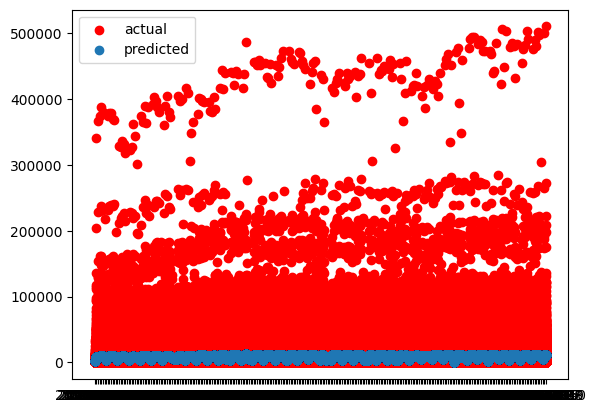

In [ ]:
#plot(data) # Invocamos a la funcion
plot(data['DIA_TRANSPORTE'], data['CANTIDAD'], data['PredictedCANTIDAD'])

In [ ]:
# Calculamos métricas de performance (R2 y RMSE)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R2=", r2_score(data["CANTIDAD"], y_pred))
mse = mean_squared_error(data["CANTIDAD"], y_pred)
rmse = np.sqrt(mse)
print("RMSE=", rmse)

R2= 0.016669411781242816
RMSE= 20056.55825564096


## **Modelo de Regresion (*sklearn*)**

In [ ]:
from sklearn.linear_model import LinearRegression

x = data['DIA_TRANSPORTE'].values.reshape(-1,1) # If your data has a single feature
y = data['CANTIDAD']

modelo = LinearRegression()
modelo.fit(x,y)

y_pred = modelo.predict(x)

ValueError: ignored

In [ ]:
#predicted_salary = pd.Series(data = pred,name='PredictedSalary')

data['PredictedCANTIDAD'] = y_pred
data.head()

,YearsExperience,Salary,PredictedSalary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


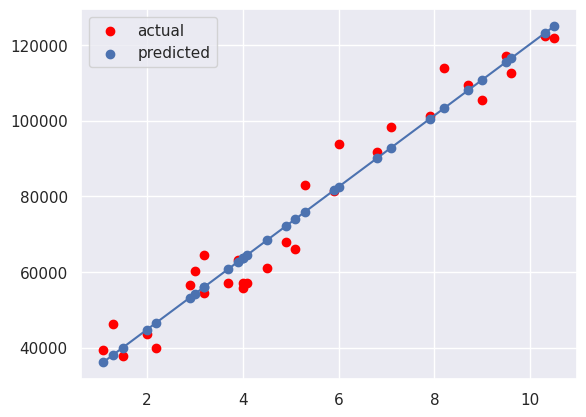

In [ ]:
plot(data['YearsExperience'], data['Salary'], data['PredictedSalary'])

In [ ]:
print("R2=", r2_score(data["CANTIDAD"], y_pred))
mse = mean_squared_error(data["CANTIDAD"], y_pred)
rmse = np.sqrt(mse)
print("RMSE=", rmse)

R2= 0.9569566641435086
RMSE= 5592.043608760661
